### This Jupyter notebook demonstrates the creation of a simple neural network for educational purposes. The goal is to make the neural network easily interpretable for beginners and help develop a better basic intuition of what complex, thousand-unit multilayer neural networks are doing in a nutshell.



In [79]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. DATASET: 5x3 "pictures" of digits 0–9 (binary pixels)
# ============================================================

digits = np.array([
    # 0
    [
        [1,1,1],
        [1,0,1],
        [1,0,1],
        [1,0,1],
        [1,1,1],
    ],
    # 1
    [
        [0,0,1],
        [0,0,1],
        [0,0,1],
        [0,0,1],
        [0,0,1],
    ],
    # 2
    [
        [1,1,1],
        [0,0,1],
        [1,1,1],
        [1,0,0],
        [1,1,1],
    ],
    # 3
    [
        [1,1,1],
        [0,0,1],
        [1,1,1],
        [0,0,1],
        [1,1,1],
    ],
    # 4
    [
        [1,0,1],
        [1,0,1],
        [1,1,1],
        [0,0,1],
        [0,0,1],
    ],
    # 5
    [
        [1,1,1],
        [1,0,0],
        [1,1,1],
        [0,0,1],
        [1,1,1],
    ],
    # 6
    [
        [1,1,1],
        [1,0,0],
        [1,1,1],
        [1,0,1],
        [1,1,1],
    ],
    # 7
    [
        [1,1,1],
        [0,0,1],
        [0,1,1],
        [0,0,1],
        [0,0,1],
    ],
    # 8
    [
        [1,1,1],
        [1,0,1],
        [1,1,1],
        [1,0,1],
        [1,1,1],
    ],
    # 9
    [
        [1,1,1],
        [1,0,1],
        [1,1,1],
        [0,0,1],
        [1,1,1],
    ],
])

In [80]:
labels = np.arange(10)    # 0..9

num_samples = digits.shape[0]
height, width = digits.shape[1], digits.shape[2]
input_size = height * width  # 5 * 3 = 15

# Flatten each 5x3 picture into a vector of length 15
X = digits.reshape(num_samples, input_size)  # shape: (10, 15)
y = labels                                   # shape: (10,)

In [75]:
def show_digit(digit_matrix):
    """Display a 5x3 digit image."""
    fig = plt.figure(facecolor='black')
    plt.imshow(digit_matrix, cmap='gray', interpolation='nearest', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()

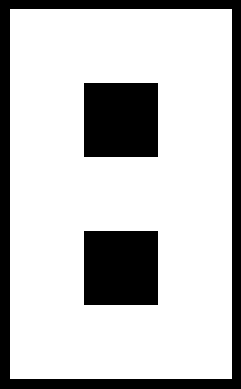

In [84]:
show_digit(digits[8])

In [83]:
def relu(x):
    return np.maximum(0, x)

def softmax(z):
    z = z - np.max(z)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z)

In [ ]:
neuron_recognizing_right_edge = np.array([
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
])

neuron_recognizing_3_horizontal_stripes = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0],
    [1, 1, 1],
])

neuron_recognizing_middle_dot = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0],
    [0, 0, 0],
])

neuron_recognizing_2nd_row_leftmost_pixel = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
])

neuron_recognizing_2nd_row_rightmost_pixel = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
])

neuron_recognizing_4th_row_leftmost_pixel = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [1, 0, 0],
    [0, 0, 0],
])

neuron_recognizing_4th_row_rightmost_pixel = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 1],
    [0, 0, 0],
])

hidden_masks = [
    neuron_recognizing_3_horizontal_stripes,
    neuron_recognizing_middle_dot,
    neuron_recognizing_right_edge,
    neuron_recognizing_2nd_row_leftmost_pixel,
    neuron_recognizing_2nd_row_rightmost_pixel,
    neuron_recognizing_4th_row_leftmost_pixel,
    neuron_recognizing_4th_row_rightmost_pixel,
]

hidden_size_manual = len(hidden_masks)

# Each mask becomes a 15-long weight vector
W_hand = np.stack([m.reshape(-1) for m in hidden_masks], axis=0)  # (7, 15)
b_hand = np.zeros(hidden_size_manual)  # no bias for these feature neurons


# === Your original output-layer "rules" turned into matrices ===
# Each [w, b] pair becomes:
#   - w  -> weight from that hidden feature
#   - all b's are summed into one bias term for that output neuron

neuron_classifying_0 = [
    [1, 0], [-100, 0], [0, 0], [1, 0], [1, 0], [1, 0], [1, 0],
]

neuron_classifying_1 = [
    [-1, 0], [-1000, 0], [2, 0], [-1000, 0], [0, 0], [-1000, 0], [0, 0],
]

neuron_classifying_2 = [
    [1, 0], [0, 0], [0, 0], [-100, 0], [0, 0], [0, 0], [-100, 0],
]

neuron_classifying_3 = [
    [1, 0], [0, 0], [0, 0], [-100, 0], [1, 0], [-100, 0], [1, 0],
]

neuron_classifying_4 = [
    [0, 0], [1, 0], [1, 0], [3, 0], [0, 0], [-100, 0], [0, 0],
]

neuron_classifying_5 = [
    [1, 0], [0, 0], [0, 0], [1, 0], [-100, 0], [-100, 0], [1, 0],
]

neuron_classifying_6 = [
    [1, 0], [0, 0], [0, 0], [1, 0], [-100, 0], [2, -1], [1, 0],
]

neuron_classifying_7 = [
    [0, 0], [9, 0], [0, 0], [-100, 0], [0, 0], [-100, 0], [0, 0],
]

neuron_classifying_8 = [
    [1, 0], [0, 0], [0, 0], [1, 0], [1, 0], [2, -1], [1, 0],
]

neuron_classifying_9 = [
    [1, 0], [0, 0], [0, 0], [1, 0], [1, 0], [-100, 0], [1, 0],
]

output_layer_lists = [
    neuron_classifying_0,
    neuron_classifying_1,
    neuron_classifying_2,
    neuron_classifying_3,
    neuron_classifying_4,
    neuron_classifying_5,
    neuron_classifying_6,
    neuron_classifying_7,
    neuron_classifying_8,
    neuron_classifying_9,
]

# Build matrix form: W_manual_out (10x7), b_manual_out (10,)
W_manual_out = np.zeros((10, hidden_size_manual))
b_manual_out = np.zeros(10)

for k, neuron in enumerate(output_layer_lists):
    neuron = np.array(neuron)
    W_manual_out[k] = neuron[:, 0]        # weights
    b_manual_out[k] = neuron[:, 1].sum()  # sum of small biases (some are -1)

In [64]:
def forward_manual(x):
    """Forward pass through your hand-designed feature network."""
    # 1) Hidden features: dot products with your masks
    h_raw = np.dot(W_hand, x) + b_hand    # (7,)
    h = relu(h_raw)

    # 2) Output scores: your classification rules
    z = np.dot(W_manual_out, h) + b_manual_out  # (10,)
    probs = softmax(z)
    return probs


def predict_manual(x):
    return int(np.argmax(forward_manual(x)))

In [65]:
print("=== Manual, hand-crafted feature network ===")
for i in range(num_samples):
    pred = predict_manual(X[i])
    print(f"Digit {y[i]} -> predicted {pred}")

=== Manual, hand-crafted feature network ===
Digit 0 -> predicted 0
Digit 1 -> predicted 1
Digit 2 -> predicted 8
Digit 3 -> predicted 3
Digit 4 -> predicted 4
Digit 5 -> predicted 5
Digit 6 -> predicted 6
Digit 7 -> predicted 7
Digit 8 -> predicted 8
Digit 9 -> predicted 9


## Gradient descent

In [66]:
hidden_size_learned = 8
output_size = 10

rng = np.random.default_rng(42)

params = {
    "W1": rng.normal(0, 0.1, size=(hidden_size_learned, input_size)),   # (8,15)
    "b1": np.zeros(hidden_size_learned),                                # (8,)
    "W2": rng.normal(0, 0.1, size=(output_size, hidden_size_learned)),  # (10,8)
    "b2": np.zeros(output_size),                                        # (10,)
}


def forward_single_learned(x, params):
    """
    Forward pass for ONE image in the learned network.
      hidden_raw = W1 · x + b1
      hidden_act = ReLU(hidden_raw)
      output_raw = W2 · hidden_act + b2
      probs = softmax(output_raw)
    """
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]

    z1 = np.dot(W1, x) + b1    # (8,)
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2   # (10,)
    probs = softmax(z2)

    cache = {"x": x, "z1": z1, "a1": a1, "z2": z2, "probs": probs}
    return probs, cache


def predict_single_learned(x, params):
    probs, _ = forward_single_learned(x, params)
    return int(np.argmax(probs))


def cross_entropy_loss(probs, true_label):
    return -np.log(probs[true_label] + 1e-12)


def train(X, y, params, learning_rate=0.1, epochs=1000, print_every=100):
    num_samples = X.shape[0]

    for epoch in range(1, epochs + 1):
        dW1 = np.zeros_like(params["W1"])
        db1 = np.zeros_like(params["b1"])
        dW2 = np.zeros_like(params["W2"])
        db2 = np.zeros_like(params["b2"])

        total_loss = 0.0
        correct = 0

        for i in range(num_samples):
            x_i = X[i]
            y_i = y[i]

            # ---------- Forward ----------
            probs, cache = forward_single_learned(x_i, params)
            total_loss += cross_entropy_loss(probs, y_i)

            if np.argmax(probs) == y_i:
                correct += 1

            # ---------- Backward ----------
            # Output layer gradient
            dz2 = probs.copy()
            dz2[y_i] -= 1            # dL/dz2 = probs - one_hot(y)

            a1 = cache["a1"]
            dW2 += np.outer(dz2, a1)
            db2 += dz2

            # Backprop into hidden layer
            W2 = params["W2"]
            dz1 = np.dot(W2.T, dz2)  # (8,)

            # ReLU derivative
            z1 = cache["z1"]
            dz1[z1 <= 0] = 0

            x_vec = cache["x"]
            dW1 += np.outer(dz1, x_vec)
            db1 += dz1

        # Average gradients
        dW1 /= num_samples
        db1 /= num_samples
        dW2 /= num_samples
        db2 /= num_samples

        # Gradient descent step
        params["W1"] -= learning_rate * dW1
        params["b1"] -= learning_rate * db1
        params["W2"] -= learning_rate * dW2
        params["b2"] -= learning_rate * db2

        if epoch % print_every == 0 or epoch == 1:
            avg_loss = total_loss / num_samples
            accuracy = correct / num_samples
            print(f"[Learned NN] Epoch {epoch:4d} | loss = {avg_loss:.4f} | acc = {accuracy*100:.1f}%")

    return params


=== Manual, hand-crafted feature network ===
Digit 0 -> predicted 0
Digit 1 -> predicted 1
Digit 2 -> predicted 8
Digit 3 -> predicted 3
Digit 4 -> predicted 4
Digit 5 -> predicted 5
Digit 6 -> predicted 6
Digit 7 -> predicted 7
Digit 8 -> predicted 8
Digit 9 -> predicted 9

=== Learned network BEFORE training ===
Digit 0 -> predicted 0
Digit 1 -> predicted 1
Digit 2 -> predicted 2
Digit 3 -> predicted 3
Digit 4 -> predicted 4
Digit 5 -> predicted 5
Digit 6 -> predicted 6
Digit 7 -> predicted 7
Digit 8 -> predicted 8
Digit 9 -> predicted 9
[Learned NN] Epoch    1 | loss = 0.0073 | acc = 100.0%
[Learned NN] Epoch  100 | loss = 0.0068 | acc = 100.0%
[Learned NN] Epoch  200 | loss = 0.0064 | acc = 100.0%
[Learned NN] Epoch  300 | loss = 0.0060 | acc = 100.0%
[Learned NN] Epoch  400 | loss = 0.0056 | acc = 100.0%
[Learned NN] Epoch  500 | loss = 0.0053 | acc = 100.0%
[Learned NN] Epoch  600 | loss = 0.0050 | acc = 100.0%
[Learned NN] Epoch  700 | loss = 0.0047 | acc = 100.0%
[Learned NN] E

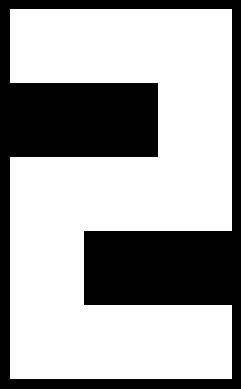

In [78]:
print("=== Manual, hand-crafted feature network ===")
for i in range(num_samples):
    pred = predict_manual(X[i])
    print(f"Digit {y[i]} -> predicted {pred}")

print("\n=== Learned network BEFORE training ===")
for i in range(num_samples):
    pred = predict_single_learned(X[i], params)
    print(f"Digit {y[i]} -> predicted {pred}")

# Train learned network
params = train(X, y, params, learning_rate=0.1, epochs=1000, print_every=100)

print("\n=== Learned network AFTER training ===")
for i in range(num_samples):
    pred = predict_single_learned(X[i], params)
    print(f"Digit {y[i]} -> predicted {pred}")

# Show an example digit visually
test_index = 2
print(f"True: {y[test_index]} | Manual: {predict_manual(X[test_index])} | Learned: {predict_single_learned(X[test_index], params)}")
show_digit(digits[test_index])